In [1]:
#CAPTURE MULTIPLE EXPOSURES TO START WITH
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImagesAndTimes():
  # List of file names  
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
  
  # List of exposure times  
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
  # Read images 
  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)
  
  return images, times

In [3]:
images, times = readImagesAndTimes()

#allign images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images,images)

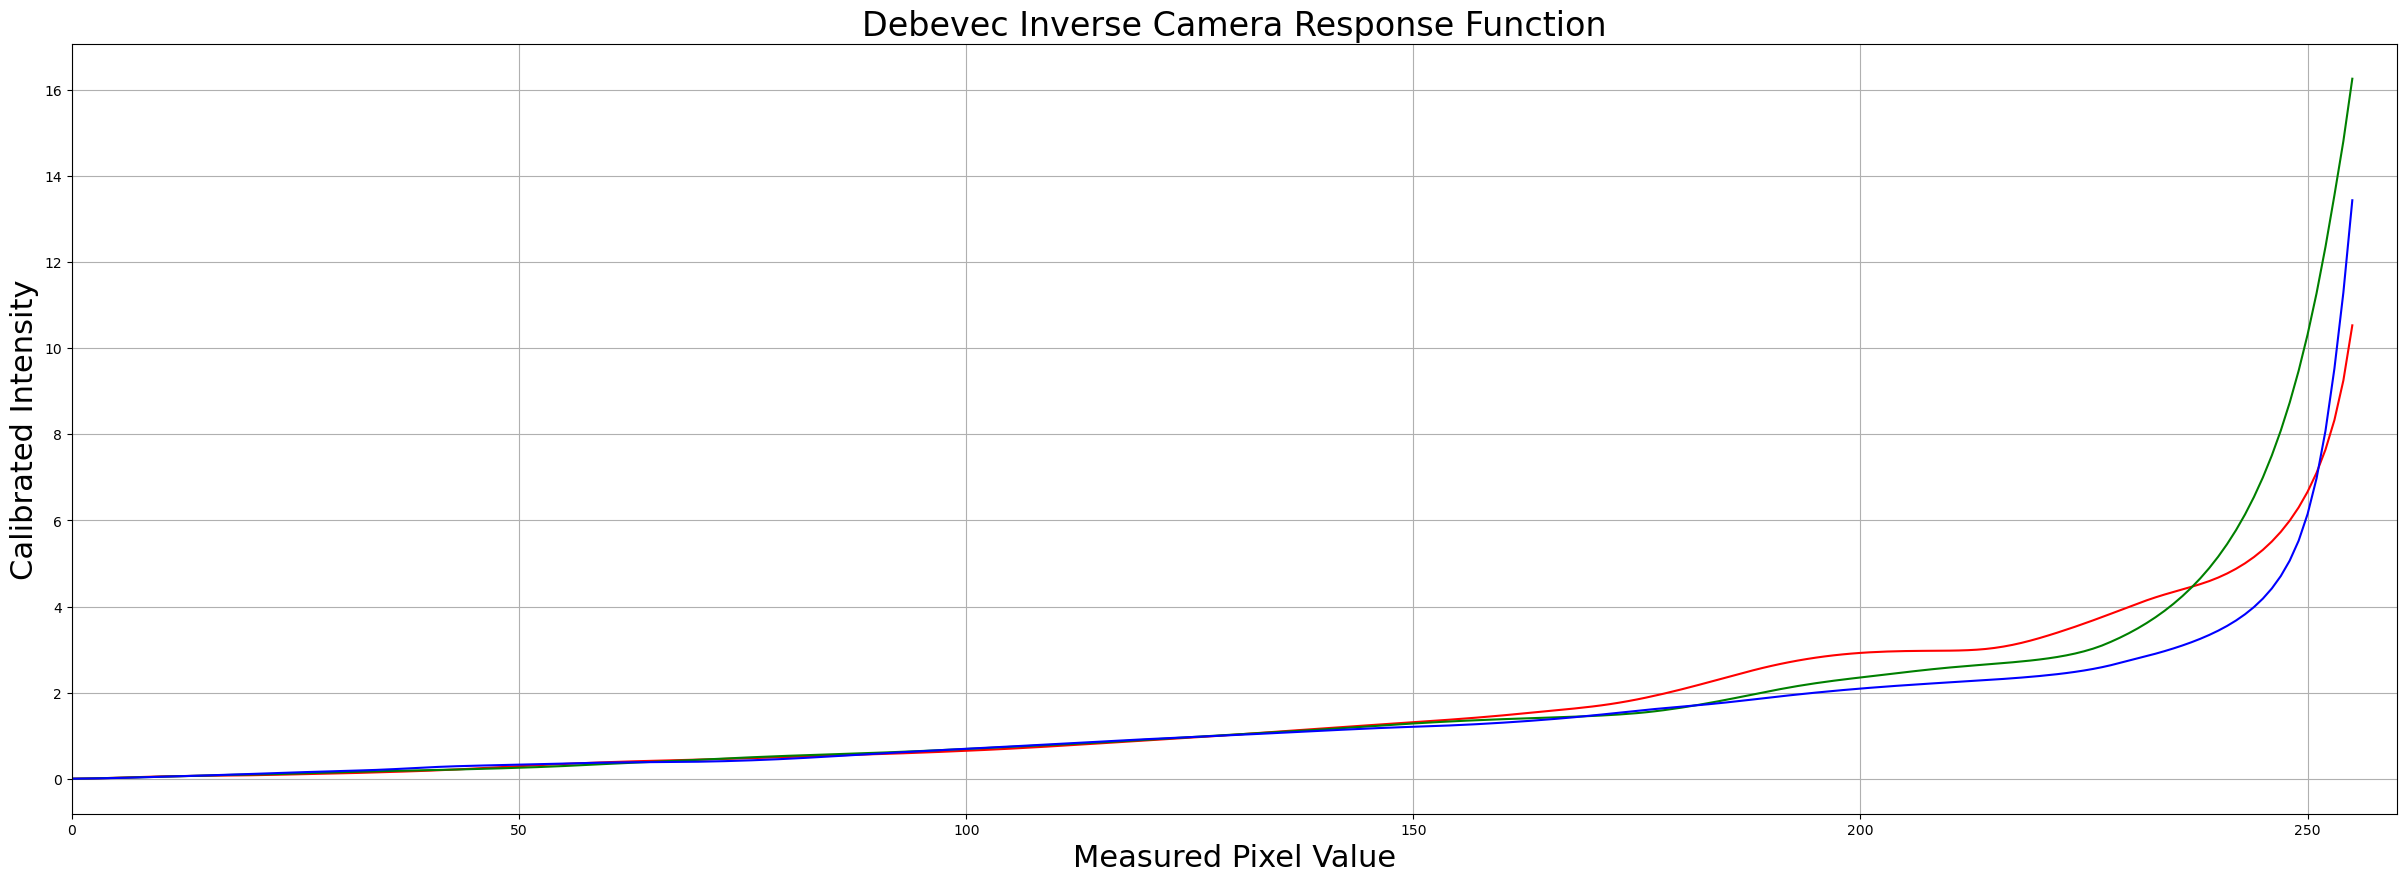

In [9]:
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30,10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0,260])
plt.grid()
plt.plot(x, y[:,0],'r'  , x, y[:,1],'g', x, y[:,2],'b');

In [11]:
#merge exposure to hdr
mergedebevec = cv2.createMergeDebevec()
hdrDebevec = mergedebevec.process(images,times,responseDebevec)

saved ldr-Drago1.jpg


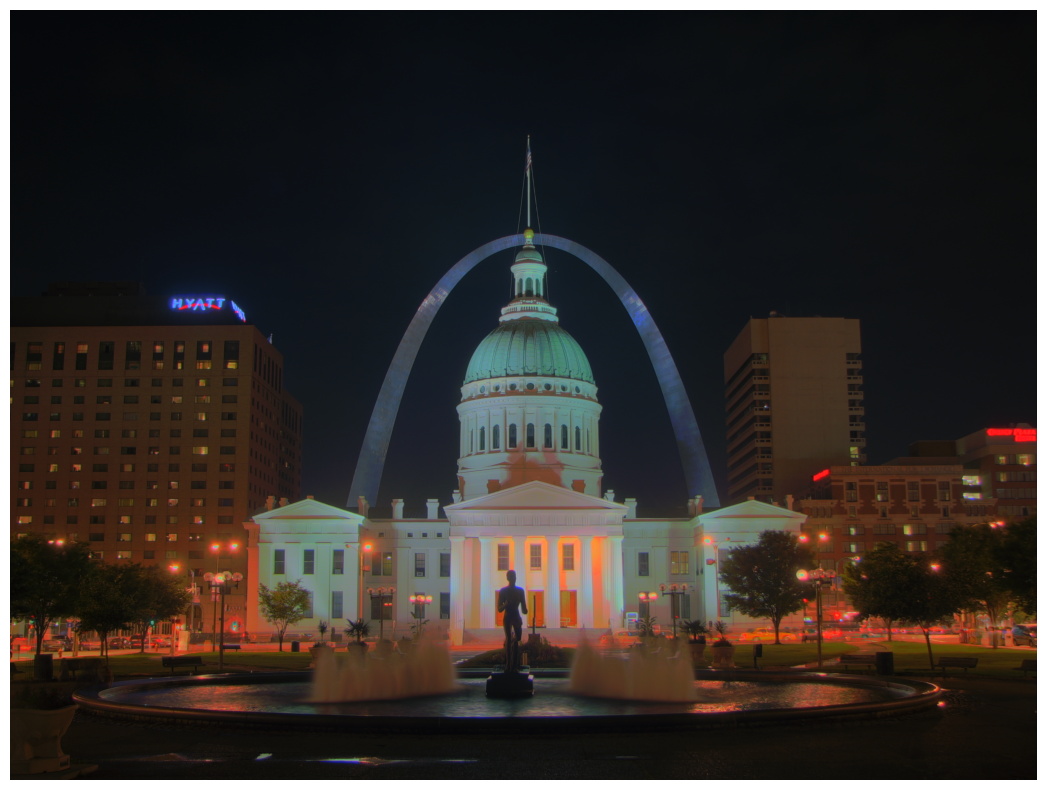

In [13]:
#tonemapping
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.9)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrDrago,0,1)); plt.axis('off');
cv2.imwrite("ldr-Drago1.jpg", ldrDrago * 255)
print("saved ldr-Drago1.jpg")

Tonemaping using Mantiuk's method ... 
saved ldr-Mantiuk.jpg


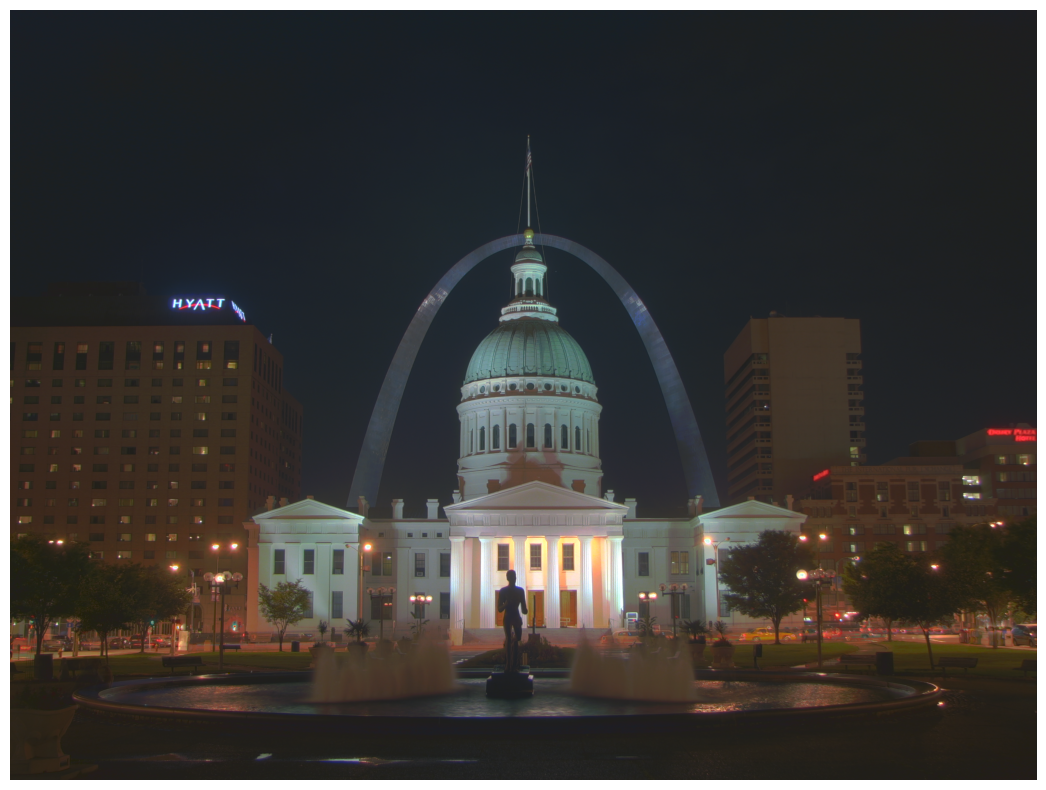

In [14]:
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrMantiuk,0,1)); plt.axis('off');
cv2.imwrite("ldr-Mantiuk1.jpg", ldrMantiuk * 255)
print("saved ldr-Mantiuk1.jpg")

Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg


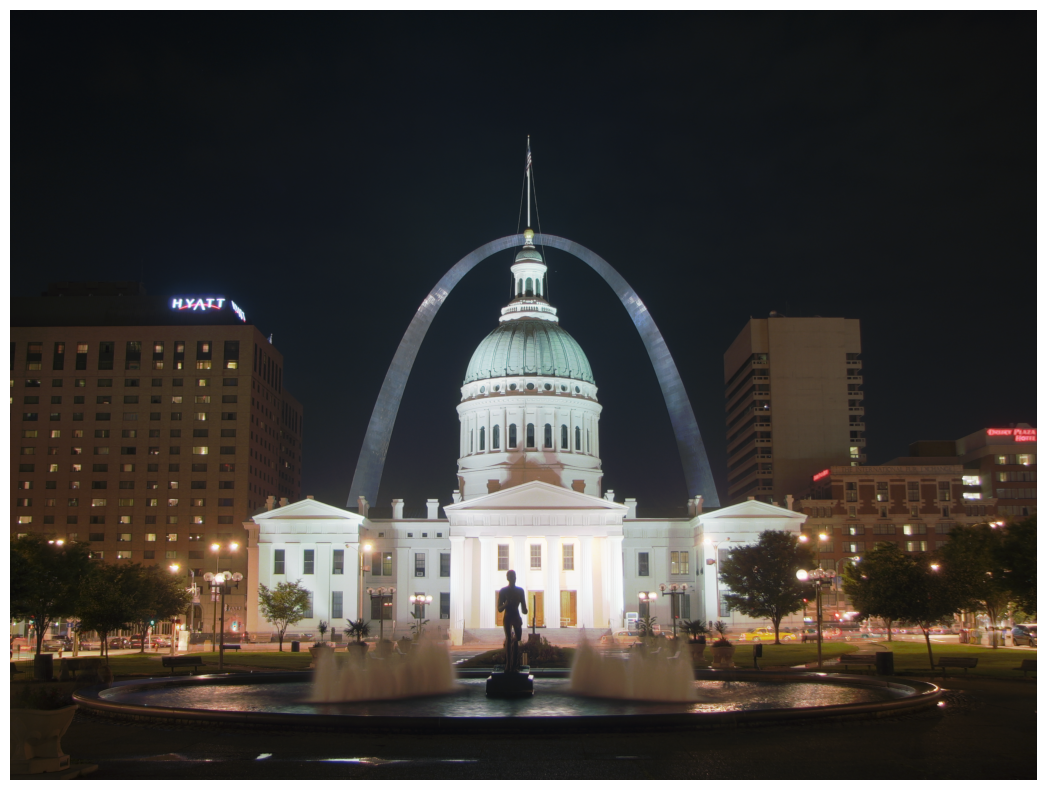

In [15]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrReinhard,0,1)); plt.axis('off');
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")